<a href="https://colab.research.google.com/github/KenDaupsey/Poisson-Regression-Modeling-with-Date-Transformation/blob/main/Poisson_Regression_Modeling_with_Date_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** Poisson Regression Modeling with Date Transformation ***

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
### Load Dataset and Examine First 5 Rows
url= "https://raw.githubusercontent.com/KenDaupsey/Basic-Poisson-Regression-Using-Python/main/PoissonDaysAbsentData.csv"

df = pd.read_csv(url)
df.head()

,id,gender,ethnic,school,mathpr,langpr,mathnce,langnce,biling,daysabs
0,1001,male,hispanic,1,63,36,56.988830,42.450860,RFEP,4
1,1002,male,hispanic,1,27,44,37.094160,46.820587,RFEP,4
2,1003,female,hispanic,1,20,38,32.275455,43.566574,RFEP,2
3,1004,female,hispanic,1,16,38,29.056717,43.566574,RFEP,3
4,1005,female,hispanic,1,2,14,6.748048,27.248474,LEP,3


In [52]:
df= pd.read_csv("/content/Poisson_Ice_Ceam_Sales.csv")
df.head()

,date,ice_cream_sales,temperature,advertising_expenditure
0,1/1/2022,57,26.189061,3623
1,1/2/2022,184,20.718089,3000
2,1/3/2022,152,22.445730,4931
3,1/4/2022,187,22.855735,1414
4,1/5/2022,55,24.769002,1220


In [53]:
df.tail()

,date,ice_cream_sales,temperature,advertising_expenditure
1821,12/27/2026,187,22.313070,4779
1822,12/28/2026,80,30.224960,1943
1823,12/29/2026,107,25.011493,2411
1824,12/30/2026,159,21.204031,1607
1825,12/31/2026,167,20.527690,3688


In [54]:
### Adding Derived Regression Variables
#We’ll add a few derived regression variables to the X matrix.
import pandas as pd

# Assuming df is your DataFrame containing the dataset
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Derive 'month' from the 'date' column
df['month'] = df['date'].dt.month

# Derive 'day_of_week' from the 'date' column (Monday=0, Sunday=6)
df['day_of_week'] = df['date'].dt.dayofweek

# Derive 'day' from the 'date' column
df['day'] = df['date'].dt.day

# Display the DataFrame to confirm the changes
print(df.head())

        date  ice_cream_sales  temperature  advertising_expenditure  month  \
0 2022-01-01               57    26.189061                     3623      1   
1 2022-01-02              184    20.718089                     3000      1   
2 2022-01-03              152    22.445730                     4931      1   
3 2022-01-04              187    22.855735                     1414      1   
4 2022-01-05               55    24.769002                     1220      1   

   day_of_week  day  
0            5    1  
1            6    2  
2            0    3  
3            1    4  
4            2    5  


In [55]:
### Data Splitting for Training and Testing
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=1471
Testing data set length=355


In [56]:
### Regression Formula Specification
expr = """ice_cream_sales ~ day  + day_of_week + month + temperature + advertising_expenditure"""

In [57]:
### Poisson Regression with Day of Week Dummy Variables

#import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame

# Define dependent variable
y_train = df_train['ice_cream_sales']
y_test = df_test['ice_cream_sales']

# Define independent variables
X_train = df_train[['day', 'month', 'temperature', 'advertising_expenditure', 'day_of_week']]
X_test = df_test[['day', 'month', 'temperature', 'advertising_expenditure', 'day_of_week']]

# Add intercept term
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit Poisson regression model
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Display model summary
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        ice_cream_sales   No. Observations:                 1471
Model:                            GLM   Df Residuals:                     1465
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16680.
Date:                Tue, 05 Mar 2024   Deviance:                       23651.
Time:                        03:25:44   Pearson chi2:                 2.27e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03411
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [58]:
# Make some predictions on the test data set.
poisson_predictions = poisson_model.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

            mean   mean_se  mean_ci_lower  mean_ci_upper
0     123.813588  0.808507     122.239041     125.408417
3     127.551901  0.925307     125.751164     129.378424
9     129.027481  0.934465     127.208902     130.872059
10    128.237596  0.688566     126.895109     129.594286
15    124.183136  0.758009     122.706317     125.677729
...          ...       ...            ...            ...
1795  125.236040  0.931810     123.422978     127.075734
1802  125.678897  0.848585     124.026658     127.353148
1808  126.743054  0.787688     125.208579     128.296334
1813  122.541731  0.747979     121.084454     124.016546
1820  122.601757  0.852791     120.941659     124.284643

[355 rows x 4 columns]


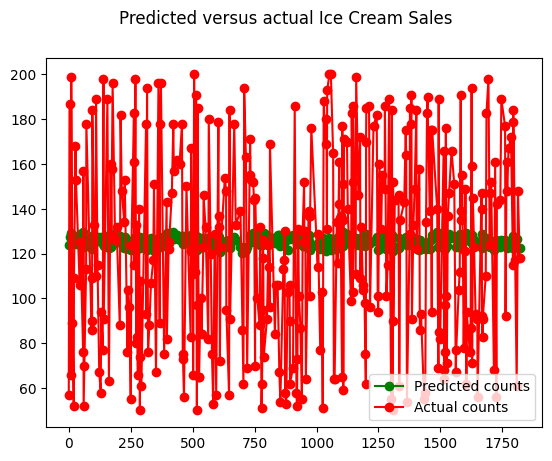

In [59]:
predicted_counts = predictions_summary_frame['mean']

# Mlot the predicted counts versus the actual counts for the test data.
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Predicted versus actual Ice Cream Sales')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, y_test, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 640x480 with 0 Axes>

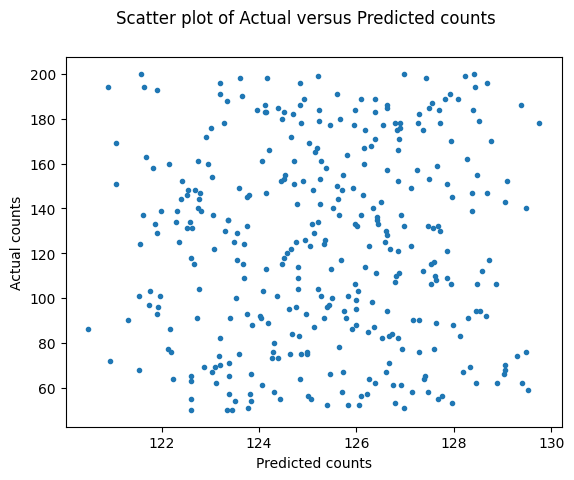

In [60]:
# Show scatter plot of Actual versus Predicted counts
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=y_test, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()